**Installing Required Libraries**

In [ ]:
!pip install pandas numpy matplotlib seaborn scikit-learn

**Importing Libraries and Loading the Dataset**

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


**Displaying Initial Data Structure and Basic Summary**

In [4]:
# Load the dataset
df = pd.read_csv('ifood_df.csv')

# Display first few rows of the dataset
df.head()


,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0


**Handling Missing or Inconsistent Data**

In [5]:
# Check the structure of the dataset: columns, data types, and missing values
df.info()

# Check for any missing values
df.isnull().sum()

# Check basic statistics for numerical columns
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,...,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.00000
mean,51622.094785,0.442177,0.506576,49.009070,306.164626,26.403175,165.312018,37.756463,27.128345,44.057143,...,0.257596,0.034467,0.089796,0.024490,0.504762,0.165079,0.215873,562.764626,518.707483,0.29932
std,20713.063826,0.537132,0.544380,28.932111,337.493839,39.784484,217.784507,54.824635,41.130468,51.736211,...,0.437410,0.182467,0.285954,0.154599,0.500091,0.371336,0.411520,575.936911,553.847248,0.68044
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,-283.000000,0.00000
25%,35196.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,56.000000,42.000000,0.00000
50%,51287.000000,0.000000,0.000000,49.000000,178.000000,8.000000,68.000000,12.000000,8.000000,25.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,343.000000,288.000000,0.00000
75%,68281.000000,1.000000,1.000000,74.000000,507.000000,33.000000,232.000000,50.000000,34.000000,56.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,964.000000,884.000000,0.00000
max,113734.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2491.000000,2458.000000,4.00000


**Data Cleaning and Feature Engineering**

In [8]:
# Check if 'Z_CostContact' and 'Z_Revenue' exist before attempting to drop them
columns_to_drop = ['Z_CostContact', 'Z_Revenue']
df = df.drop([col for col in columns_to_drop if col in df.columns], axis=1, inplace=False)

# Handle missing values using forward fill (updated to avoid FutureWarning)
df.ffill(inplace=True)

# Feature engineering: total purchases, total products purchased, etc.
df['TotalPurchases'] = df['NumDealsPurchases'] + df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']
df['TotalSpent'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']


**Descriptive Statistics and Metrics**

In [9]:
# Calculate the average purchase value, frequency of purchases, etc.
average_purchase_value = df['TotalSpent'].mean()
purchase_frequency = df['TotalPurchases'].mean()

print(f'Average Purchase Value: {average_purchase_value}')
print(f'Purchase Frequency: {purchase_frequency}')

# Descriptive statistics for key variables
df[['Income', 'Age', 'TotalSpent', 'TotalPurchases']].describe()


Average Purchase Value: 606.821768707483
Purchase Frequency: 14.88798185941043


,Income,Age,TotalSpent,TotalPurchases
count,2205.000000,2205.000000,2205.000000,2205.000000
mean,51622.094785,51.095692,606.821769,14.887982
std,20713.063826,11.705801,601.675284,7.615277
min,1730.000000,24.000000,5.000000,0.000000
25%,35196.000000,43.000000,69.000000,8.000000
50%,51287.000000,50.000000,397.000000,15.000000
75%,68281.000000,61.000000,1047.000000,21.000000
max,113734.000000,80.000000,2525.000000,43.000000


**Customer Segmentation using K-Means Clustering**

In [10]:
# Select relevant features for clustering
features = df[['Income', 'Age', 'TotalSpent', 'TotalPurchases', 'NumWebVisitsMonth', 'Recency']]

# Standardize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)

# Display the number of customers in each cluster
df['Cluster'].value_counts()


Cluster
3    580
1    549
2    539
0    537
Name: count, dtype: int64

**Visualization of Clusters**

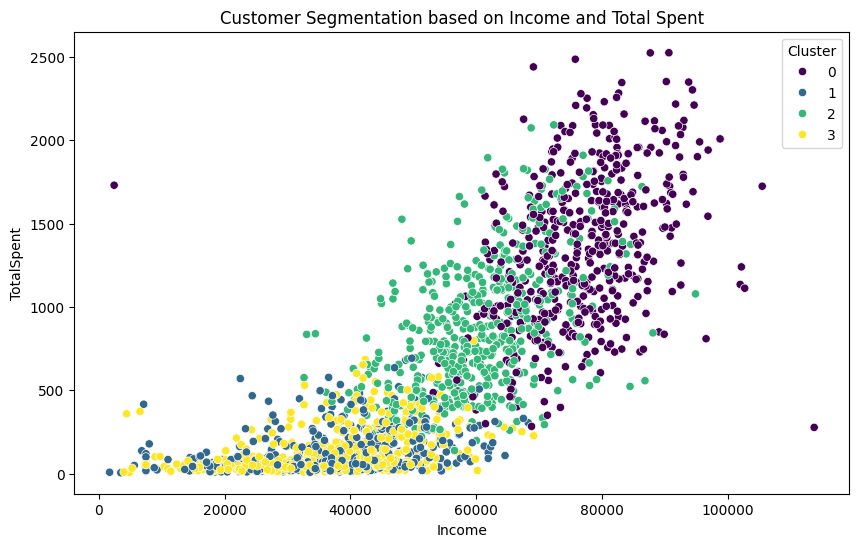

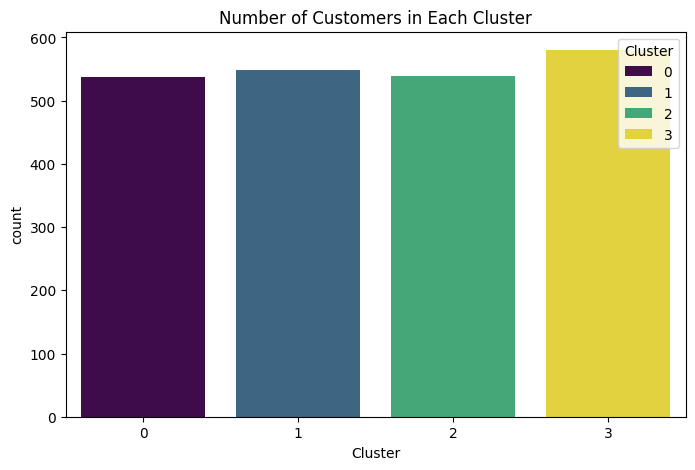

In [12]:
# Visualize clusters with a scatter plot for TotalSpent vs Income
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Income', y='TotalSpent', hue='Cluster', data=df, palette='viridis')
plt.title('Customer Segmentation based on Income and Total Spent')
plt.show()

# Bar plot for the number of customers in each cluster
plt.figure(figsize=(8, 5))
sns.countplot(x='Cluster', data=df, hue='Cluster', palette='viridis')
plt.title('Number of Customers in Each Cluster')
plt.show()


**Insights and Recommendations**

In [13]:
# Analyze the characteristics of each cluster
cluster_analysis = df.groupby('Cluster').mean()[['Income', 'Age', 'TotalSpent', 'TotalPurchases', 'NumWebVisitsMonth', 'Recency']]
print(cluster_analysis)

# Based on the above, we can make insights like:
# - High-income customers (Cluster 0) spend more on products.
# - Cluster 3 customers have the highest web visits but low spending, indicating they browse more than purchase.

# Provide recommendations based on the segments:
# - Target Cluster 0 with premium offerings and personalized marketing.
# - Focus on retaining Cluster 1 through loyalty programs as they spend moderately but purchase regularly.
# - Improve conversion strategies for Cluster 3, potentially through discounts or better online offers.


               Income        Age   TotalSpent  TotalPurchases  \
Cluster                                                         
0        76679.921788  50.301676  1353.085661       20.206704   
1        35905.271403  49.510018   130.650273        8.892532   
2        60685.836735  57.515770   864.784787       22.348794   
3        34875.760345  47.365517   126.877586        8.705172   

         NumWebVisitsMonth    Recency  
Cluster                                
0                 2.415270  50.148976  
1                 6.466302  75.344262  
2                 5.829314  48.224490  
3                 6.515517  23.755172  


**Optimizing K-Means Clustering (Elbow Method or Silhouette Score)**

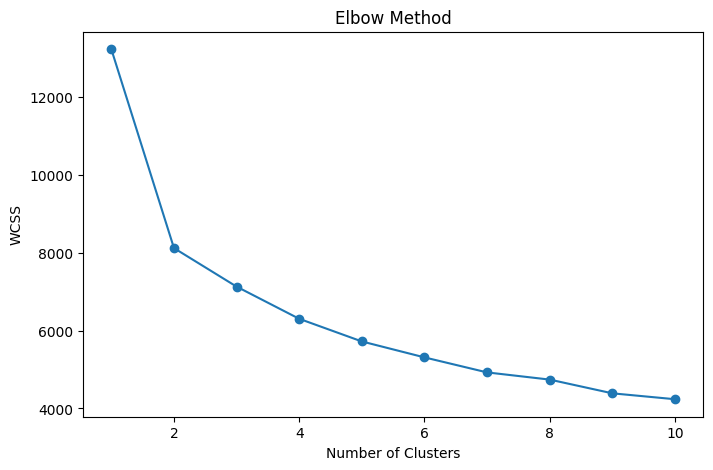

In [14]:
# Using the Elbow Method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

# Plotting the results of the Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


In [15]:
# Calculate silhouette score for different numbers of clusters
from sklearn.metrics import silhouette_score

for n_clusters in range(2, 6):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(scaled_features)
    silhouette_avg = silhouette_score(scaled_features, labels)
    print(f"For n_clusters={n_clusters}, the silhouette score is {silhouette_avg}")


For n_clusters=2, the silhouette score is 0.33828778740305154
For n_clusters=3, the silhouette score is 0.23929563147338506
For n_clusters=4, the silhouette score is 0.2011538262137106
For n_clusters=5, the silhouette score is 0.20469588597052413


**Segmentation Using Different Clustering Algorithms**

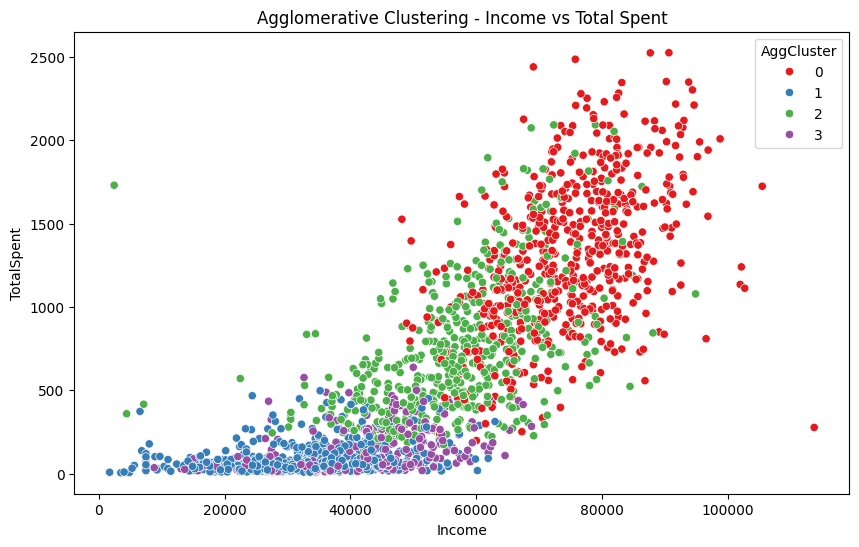

In [16]:
from sklearn.cluster import AgglomerativeClustering

# Perform Agglomerative Clustering
agg_clust = AgglomerativeClustering(n_clusters=4)
df['AggCluster'] = agg_clust.fit_predict(scaled_features)

# Visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Income', y='TotalSpent', hue='AggCluster', data=df, palette='Set1')
plt.title('Agglomerative Clustering - Income vs Total Spent')
plt.show()


**Customer Lifetime Value (CLV) Analysis**

Cluster
0    27631.482309
1     1626.786885
2    20227.894249
3     1587.567241
Name: CLV, dtype: float64


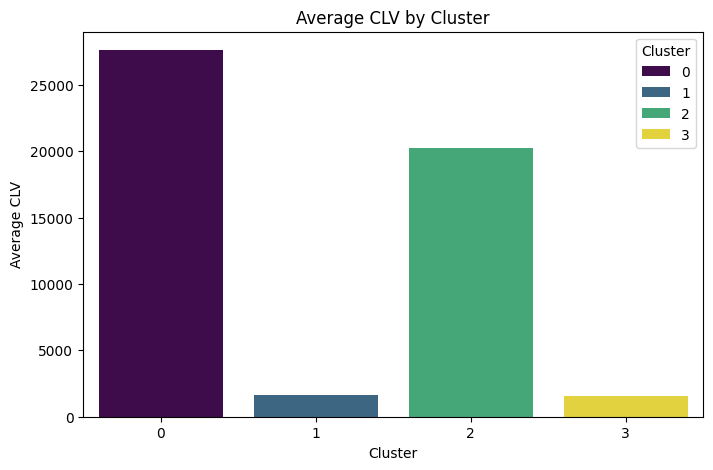

In [18]:
# Calculate Customer Lifetime Value (CLV) based on a simplified formula
df['CLV'] = df['TotalSpent'] * df['TotalPurchases']

# Analyze CLV for each cluster
clv_by_cluster = df.groupby('Cluster')['CLV'].mean()
print(clv_by_cluster)

# Visualize CLV distribution by cluster
plt.figure(figsize=(8, 5))
sns.barplot(x=clv_by_cluster.index, y=clv_by_cluster.values, hue=clv_by_cluster.index, palette='viridis')
plt.title('Average CLV by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average CLV')
plt.show()


**RFM Analysis (Recency, Frequency, Monetary Value)**

   RFMScore        Income   TotalSpent  TotalPurchases    Recency
0         0  31347.188976    36.842520        5.346457  12.307087
1         1  31191.579235    52.606557        6.163934  29.841530
2         2  35062.930041   103.810700        8.181070  38.304527
3         3  37140.279863   135.225256        8.696246  59.972696
4         4  47240.681223   369.078603       13.231441  48.842795
5         5  58962.794643   733.526786       17.645833  42.139881
6         6  65274.432624  1023.517730       20.716312  45.354610
7         7  68055.996226  1160.577358       21.894340  60.954717
8         8  70639.164706  1263.782353       23.082353  77.252941
9         9  73437.285714  1517.883117       25.428571  87.545455


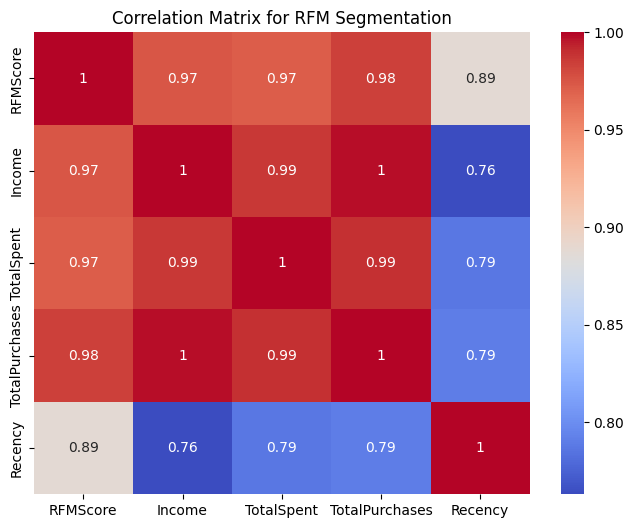

In [19]:
# Creating RFM segmentation
df['RecencyScore'] = pd.qcut(df['Recency'], 4, labels=False)
df['FrequencyScore'] = pd.qcut(df['TotalPurchases'], 4, labels=False)
df['MonetaryScore'] = pd.qcut(df['TotalSpent'], 4, labels=False)

# Combine RFM scores
df['RFMScore'] = df['RecencyScore'] + df['FrequencyScore'] + df['MonetaryScore']

# Analyzing RFM segments
rfm_analysis = df.groupby('RFMScore').agg({
    'Income': 'mean', 
    'TotalSpent': 'mean', 
    'TotalPurchases': 'mean', 
    'Recency': 'mean'
}).reset_index()

print(rfm_analysis)

# Visualizing RFM scores
plt.figure(figsize=(8, 6))
sns.heatmap(rfm_analysis.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for RFM Segmentation')
plt.show()


**Predictive Modeling**

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Example: Predicting 'Response' column using RandomForest
X = df[['Income', 'TotalSpent', 'TotalPurchases', 'Recency']]
y = df['Response']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a RandomForest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))


Accuracy: 0.8444108761329305
              precision    recall  f1-score   support

           0       0.89      0.93      0.91       571
           1       0.41      0.31      0.35        91

    accuracy                           0.84       662
   macro avg       0.65      0.62      0.63       662
weighted avg       0.83      0.84      0.83       662



**Visualization: Advanced Plots**

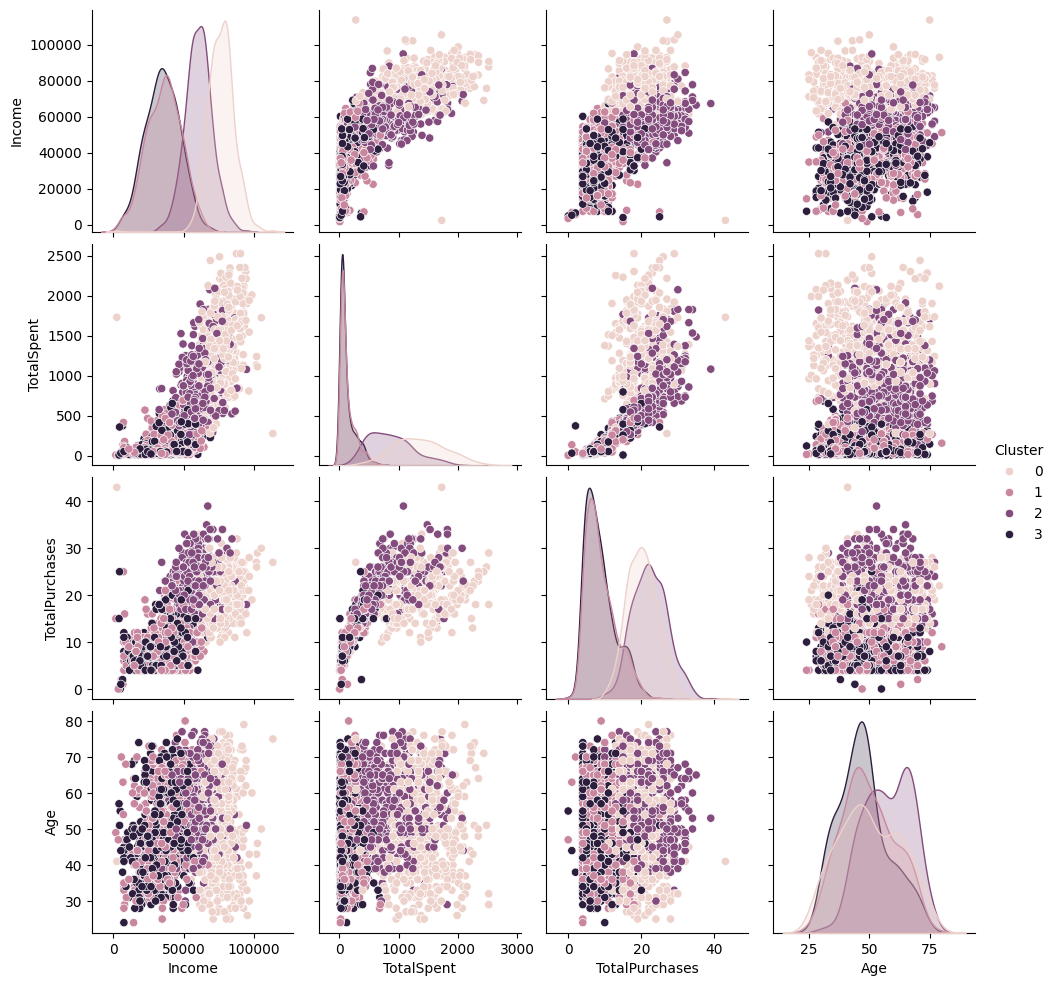

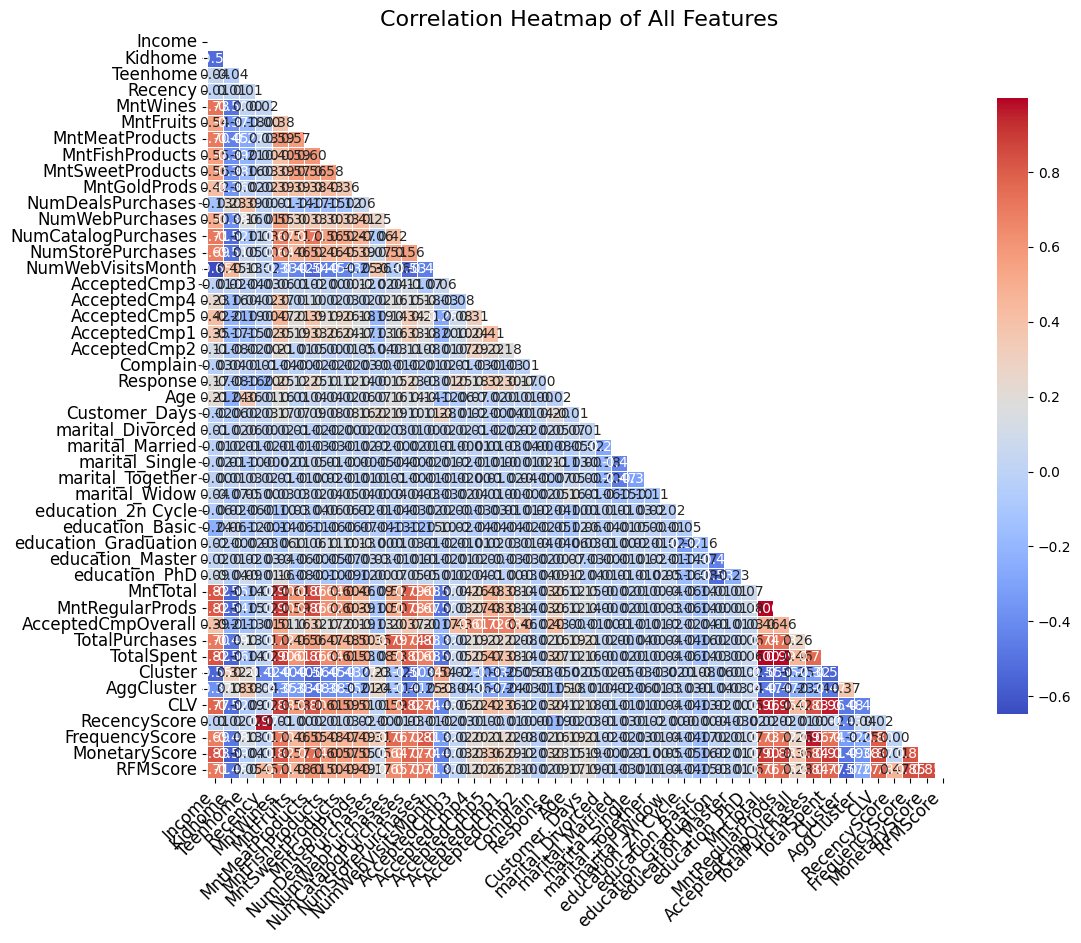

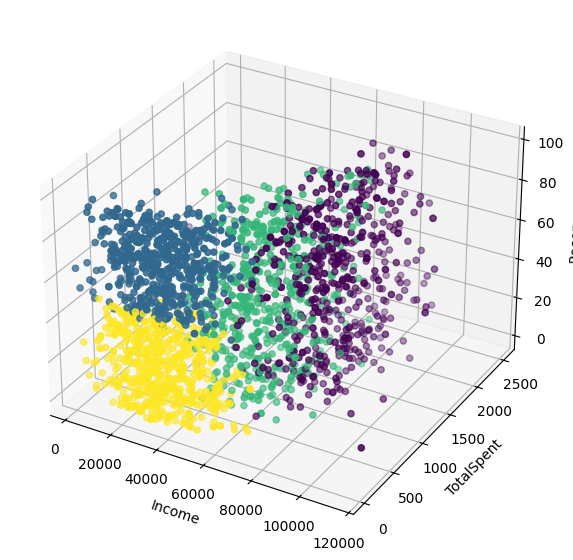

In [26]:
# Pairplot for customer clusters
sns.pairplot(df, hue='Cluster', vars=['Income', 'TotalSpent', 'TotalPurchases', 'Age'])
plt.show()

# Improved Correlation Heatmap
plt.figure(figsize=(12, 10))  # Increased size for better readability
correlation_matrix = df.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', mask=mask, cmap='coolwarm', 
            square=True, linewidths=.5, cbar_kws={"shrink": .8}, annot_kws={"size": 10})

plt.title('Correlation Heatmap of All Features', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)  # Rotate x labels for readability
plt.yticks(fontsize=12)  # Increase font size for y labels
plt.show()

# 3D Scatter Plot
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Income'], df['TotalSpent'], df['Recency'], c=df['Cluster'], cmap='viridis')
ax.set_xlabel('Income')
ax.set_ylabel('TotalSpent')
ax.set_zlabel('Recency')
plt.show()


**Dimensionality Reduction**

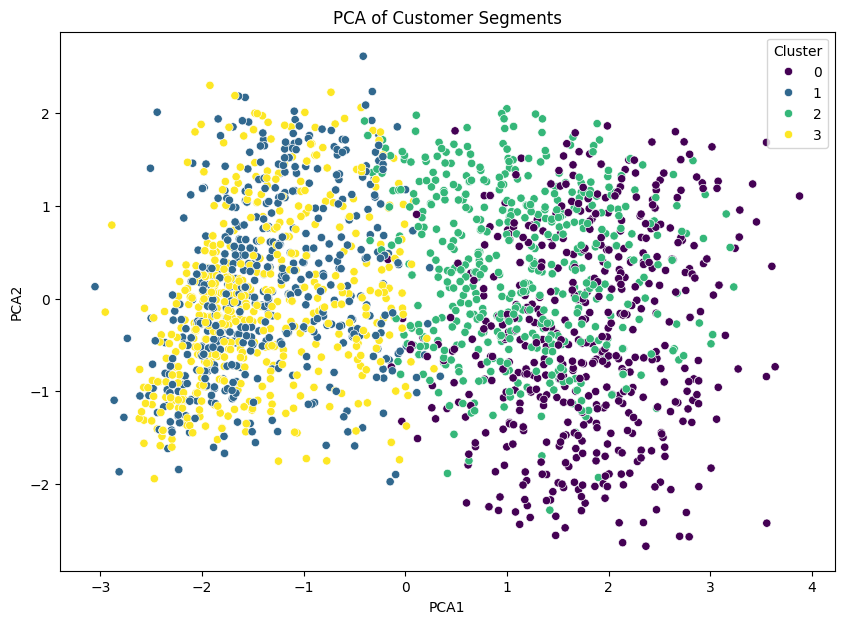

In [27]:
from sklearn.decomposition import PCA

# Standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[['Income', 'TotalSpent', 'TotalPurchases', 'Age']])

# PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

# Add PCA results to the DataFrame
df['PCA1'] = pca_result[:, 0]
df['PCA2'] = pca_result[:, 1]

# Plotting PCA
plt.figure(figsize=(10, 7))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df, palette='viridis')
plt.title('PCA of Customer Segments')
plt.show()


**Cluster Validation Metrics**

In [29]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

silhouette_avg = silhouette_score(scaled_data, df['Cluster'])
db_index = davies_bouldin_score(scaled_data, df['Cluster'])

print(f'Silhouette Score: {silhouette_avg:.3f}')
print(f'Davies-Bouldin Index: {db_index:.3f}')


Silhouette Score: 0.073
Davies-Bouldin Index: 6.920


**Detailed Cluster Analysis**

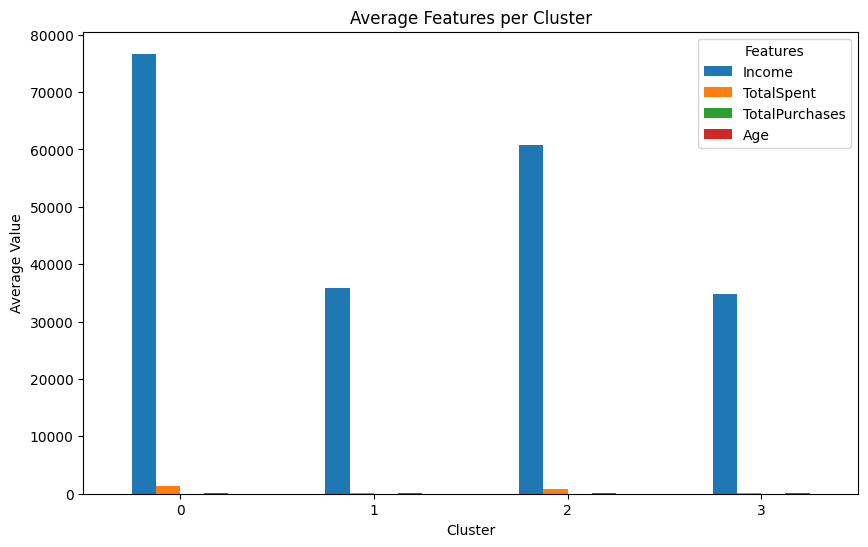

In [30]:
cluster_means = df.groupby('Cluster').mean()
cluster_means = cluster_means[['Income', 'TotalSpent', 'TotalPurchases', 'Age']]

cluster_means.plot(kind='bar', figsize=(10, 6))
plt.title('Average Features per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Value')
plt.xticks(rotation=0)
plt.legend(title='Features')
plt.show()


**Customer Profiles**

In [31]:
customer_profiles = df.groupby('Cluster').agg({
    'Income': 'mean',
    'TotalSpent': 'mean',
    'TotalPurchases': 'mean',
    'Age': 'mean',
    'NumWebPurchases': 'mean',
    'NumStorePurchases': 'mean',
    'NumDealsPurchases': 'mean',
}).reset_index()

print(customer_profiles)


   Cluster        Income   TotalSpent  TotalPurchases        Age  \
0        0  76679.921788  1353.085661       20.206704  50.301676   
1        1  35905.271403   130.650273        8.892532  49.510018   
2        2  60685.836735   864.784787       22.348794  57.515770   
3        3  34875.760345   126.877586        8.705172  47.365517   

   NumWebPurchases  NumStorePurchases  NumDealsPurchases  
0         4.824953           8.318436           1.286778  
1         2.506375           3.460838           2.222222  
2         6.751391           8.294991           3.627087  
3         2.475862           3.453448           2.148276  


**Predictive Modeling**

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

X = df[['Income', 'TotalSpent', 'TotalPurchases', 'Age']]
y = df['Cluster']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.85      0.88      0.86       155
           1       0.54      0.46      0.50       171
           2       0.85      0.82      0.84       171
           3       0.52      0.59      0.55       165

    accuracy                           0.69       662
   macro avg       0.69      0.69      0.69       662
weighted avg       0.69      0.69      0.68       662



**Visualizations for Insights**

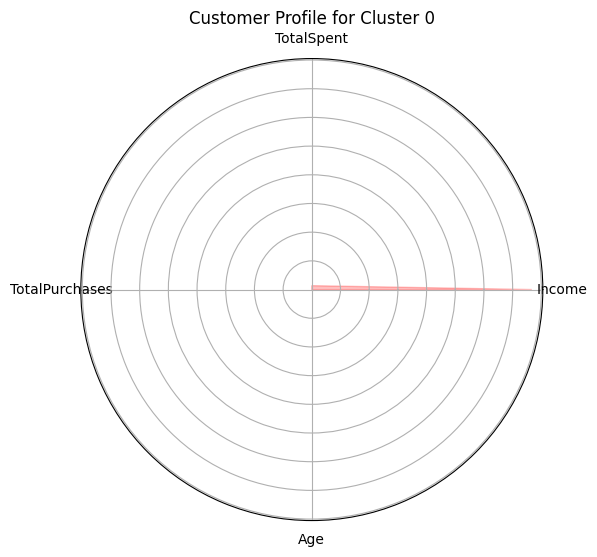

In [33]:
import matplotlib.pyplot as plt

# Radar chart for a specific cluster
cluster_0 = df[df['Cluster'] == 0].mean()[['Income', 'TotalSpent', 'TotalPurchases', 'Age']]
labels = cluster_0.index.tolist()
values = cluster_0.values.tolist()

# Create radar chart
angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
values += values[:1]
angles += angles[:1]

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
ax.fill(angles, values, color='red', alpha=0.25)
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)
plt.title('Customer Profile for Cluster 0')
plt.show()
